In [1]:
import pandas as pd
import pytz
import datetime as dt
import math
import seaborn as sns

In [2]:
#shimmer_sensor_path =  "D:/Datasets/sony_digirelax/shimmer/VP001_251023_Session1_Shimmer_8108_Calibrated_SD.csv"
shimmer_sensor_path = "/home/muhammad/Desktop/Datasets/data_sony_digiRelax/pilot_study/VP001_251023/Shimmer_data/2023-10-25_07.34.27_VP001_251023_SD_Session1/VP001_251023_Session1_Shimmer_FBA7_Calibrated_SD.csv"

In [3]:
time_zone = 'Europe/Berlin'
tz = pytz.timezone(time_zone)

In [4]:
def read_shimmer_sensor(sensor_file_path):
    
    shimmer_df = pd.read_csv(sensor_file_path, sep='\t', low_memory=False)
    shimmer_df = shimmer_df.reset_index()
    shimmer_df.columns = shimmer_df.iloc[0]
    shimmer_df.drop([0, 1], axis=0, inplace=True)
    
    return shimmer_df

In [5]:
shimmer_df = read_shimmer_sensor(shimmer_sensor_path)

In [24]:
shimmer_df

,Shimmer_FBA7_Timestamp_Unix_CAL,Shimmer_FBA7_Accel_LN_X_CAL,Shimmer_FBA7_Accel_LN_Y_CAL,Shimmer_FBA7_Accel_LN_Z_CAL,Shimmer_FBA7_GSR_Range_CAL,Shimmer_FBA7_GSR_Skin_Conductance_CAL,Shimmer_FBA7_GSR_Skin_Resistance_CAL,NaN
2,1.6982179802870789E12,-2.4216867469879517,9.46987951807229,-0.8674698795180723,0.0,6.724618664917171,148.70731707317077,NaN
3,1.6982179802948914E12,-2.4216867469879517,9.457831325301205,-0.8915662650602411,0.0,6.724618664917171,148.70731707317077,NaN
4,1.6982179802987976E12,-2.397590361445783,9.457831325301205,-0.8674698795180723,0.0,6.724618664917171,148.70731707317077,NaN
5,1.6982179803027039E12,-2.36144578313253,9.421686746987952,-0.8433734939759037,0.0,6.724618664917171,148.70731707317077,NaN
6,1.69821798030661E12,-2.3734939759036147,9.409638554216867,-0.8795180722891567,0.0,6.724618664917171,148.70731707317077,NaN
...,...,...,...,...,...,...,...,...
1079536,1.69822219824411E12,-0.5421686746987953,9.072289156626507,3.662650602409639,1.0,12.70436880192978,78.71308016877636,NaN
1079537,1.6982221982480164E12,-0.5301204819277109,9.072289156626507,3.6506024096385543,1.0,12.709474033515848,78.68146214099215,NaN
1079538,1.6982221982519226E12,-0.5421686746987953,9.072289156626507,3.6385542168674703,1.0,12.709474033515848,78.68146214099215,NaN
1079539,1.6982221982558289E12,-0.5301204819277109,9.060240963855422,3.6144578313253013,1.0,12.714579265101914,78.64986950411563,NaN


In [7]:
ref_wrong=float(shimmer_df.iloc[0,0])

In [8]:
ref = float(shimmer_df.iloc[0,0])/1000
    

In [9]:
ref

1698217980.2870789

In [10]:

end_ = float(shimmer_df.iloc[shimmer_df.shape[0] - 1, 0]) / 1000

In [11]:
end_

1698222198.259735

In [12]:
tz = pytz.timezone(time_zone)

In [13]:
exp_onset = dt.datetime.fromtimestamp(ref, tz)

In [14]:
exp_onset

datetime.datetime(2023, 10, 25, 9, 13, 0, 287079, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

In [15]:
exp_offset = dt.datetime.fromtimestamp(end_, tz)

In [16]:
exp_offset

datetime.datetime(2023, 10, 25, 10, 23, 18, 259735, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

In [17]:
duration = exp_offset - exp_onset

In [18]:
duration

datetime.timedelta(seconds=4217, microseconds=972656)

In [19]:
start = str(exp_onset.time())

In [20]:
start

'09:13:00.287079'

In [21]:
end =  str(exp_offset.time())

In [22]:
end

'10:23:18.259735'

/tmp/ipykernel_101080/1245389435.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(shimmer_df["Shimmer_FBA7_GSR_Skin_Conductance_CAL"], hist=True, kde= False, bins=int(180/5), color='blue', hist_kws= {"edgecolor":"black"} )


<Axes: xlabel='Shimmer_FBA7_GSR_Skin_Conductance_CAL'>

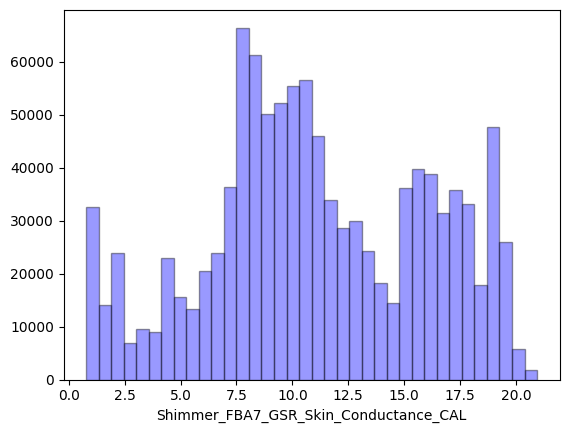

In [25]:
sns.distplot(shimmer_df["Shimmer_FBA7_GSR_Skin_Conductance_CAL"], hist=True, kde= False, bins=int(180/5), color='blue', hist_kws= {"edgecolor":"black"} )

/tmp/ipykernel_101080/2166879841.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(shimmer_df["Shimmer_FBA7_GSR_Skin_Resistance_CAL"], hist=True, kde= False, bins=int(180/5), color='blue', hist_kws= {"edgecolor":"black"} )


<Axes: xlabel='Shimmer_FBA7_GSR_Skin_Resistance_CAL'>

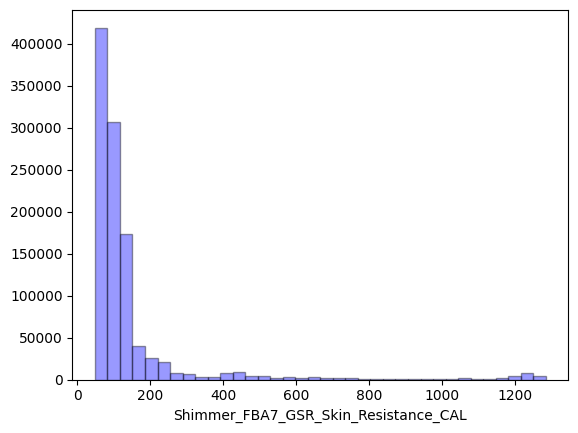

In [26]:
sns.distplot(shimmer_df["Shimmer_FBA7_GSR_Skin_Resistance_CAL"], hist=True, kde= False, bins=int(180/5), color='blue', hist_kws= {"edgecolor":"black"} )

<Axes: xlabel='Shimmer_8108_ECG_LL-LA_24BIT_CAL', ylabel='Count'>

/tmp/ipykernel_98793/844455784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(shimmer_df["Shimmer_8108_ECG_LL-LA_24BIT_CAL"], hist=True, kde= False, color='blue', hist_kws= {"edgecolor":"black"} )


<Axes: xlabel='Shimmer_8108_ECG_LL-LA_24BIT_CAL'>

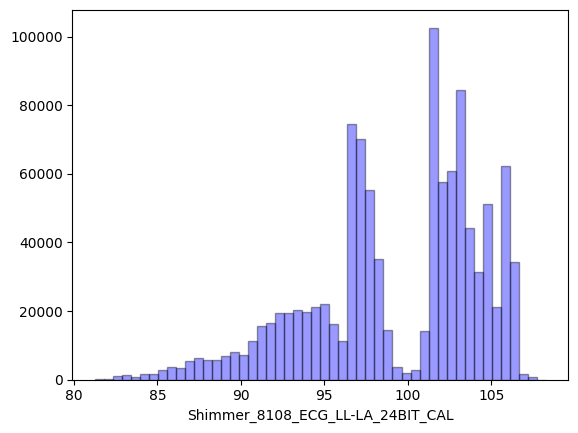

In [94]:
sns.distplot(shimmer_df["Shimmer_8108_ECG_LL-LA_24BIT_CAL"], hist=True, kde= False, color='blue', hist_kws= {"edgecolor":"black"} )

## Psychopy data

In [36]:
psychopy_path = "/home/muhammad/Desktop/Datasets/data_sony_digiRelax/pilot_study/VP001_251023/Psychopy_data/VP001_251023_DigiRelax_Experiment_2023-10-25_09h16.01.523.csv"


In [37]:
psychopy_df = pd.read_csv(psychopy_path)

In [38]:
psychopy_df

,Reference_time,sam_e_rt,sam_e_ts,mouse_e.x,mouse_e.y,mouse_e.leftButton,mouse_e.midButton,mouse_e.rightButton,sam_a_rt,sam_a_ts,...,key_resp_3.rt,saliva_probe_4_ts,final_instruction_ts,participant,session,date,expName,psychopyVersion,frameRate,Unnamed: 35
0,1.698218e+09,15.996141,1.698218e+09,-0.406481,-0.139815,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,VP001_251023,1.0,2023-10-25_09h16.01.523,DigiRelax_Experiment,2022.2.4,60.124518,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.486024,1.698218e+09,...,NaN,NaN,NaN,VP001_251023,1.0,2023-10-25_09h16.01.523,DigiRelax_Experiment,2022.2.4,60.124518,NaN
2,NaN,6.714147,1.698220e+09,0.591667,-0.150000,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,VP001_251023,1.0,2023-10-25_09h16.01.523,DigiRelax_Experiment,2022.2.4,60.124518,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.564849,1.698220e+09,...,NaN,NaN,NaN,VP001_251023,1.0,2023-10-25_09h16.01.523,DigiRelax_Experiment,2022.2.4,60.124518,NaN
4,NaN,59.619881,1.698221e+09,-0.411111,-0.159259,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,VP001_251023,1.0,2023-10-25_09h16.01.523,DigiRelax_Experiment,2022.2.4,60.124518,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.739751,1.698221e+09,...,NaN,NaN,NaN,VP001_251023,1.0,2023-10-25_09h16.01.523,DigiRelax_Experiment,2022.2.4,60.124518,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,602.997034,NaN,NaN,VP001_251023,1.0,2023-10-25_09h16.01.523,DigiRelax_Experiment,2022.2.4,60.124518,NaN
7,NaN,11.281163,1.698222e+09,-0.104630,-0.315741,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,VP001_251023,1.0,2023-10-25_09h16.01.523,DigiRelax_Experiment,2022.2.4,60.124518,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.273688,1.698222e+09,...,NaN,NaN,NaN,VP001_251023,1.0,2023-10-25_09h16.01.523,DigiRelax_Experiment,2022.2.4,60.124518,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.698222e+09,1.698222e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
ref_psy = float(psychopy_df.iloc[0,0])

In [40]:
ref_psy

1698218168.1472008

In [41]:
psychopy_start = dt.datetime.fromtimestamp(ref_psy, tz)

In [42]:
psychopy_start

datetime.datetime(2023, 10, 25, 9, 16, 8, 147201, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

In [44]:
end_exp = psychopy_df["final_instruction_ts"].values[-1]

In [45]:
end_exp

1698222138.2349458

In [46]:
psychopy_end = dt.datetime.fromtimestamp(end_exp, tz)

In [47]:
psychopy_end

datetime.datetime(2023, 10, 25, 10, 22, 18, 234946, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

In [48]:
ts_end = dt.datetime.timestamp(psychopy_end)

In [49]:
ts_end

1698222138.234946

In [51]:
sam_e_ts = [val for val in psychopy_df["sam_e_ts"].to_list() if not(math.isnan(val))]

In [52]:
sam_e_ts

[1698218434.7052257, 1698219805.110611, 1698221289.7617822, 1698222004.4851725]

In [55]:
sam_a_ts =[val for val in psychopy_df["sam_a_ts"].to_list() if not(math.isnan(val))]

In [56]:
sam_a_ts

[1698218476.3730214,
 1698219814.1707582,
 1698221296.9562707,
 1698222021.8138652]

In [57]:
dt.datetime.fromtimestamp(sam_e_ts[0], tz)

datetime.datetime(2023, 10, 25, 9, 20, 34, 705226, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

In [58]:
dt.datetime.fromtimestamp(sam_a_ts[0], tz)

datetime.datetime(2023, 10, 25, 9, 21, 16, 373021, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

In [59]:
dt.datetime.fromtimestamp(sam_e_ts[1], tz)

datetime.datetime(2023, 10, 25, 9, 43, 25, 110611, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

In [60]:
dt.datetime.fromtimestamp(sam_a_ts[1], tz)

datetime.datetime(2023, 10, 25, 9, 43, 34, 170758, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

In [62]:
dt.datetime.fromtimestamp(sam_e_ts[2], tz)

datetime.datetime(2023, 10, 25, 10, 8, 9, 761782, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)

In [63]:
dt.datetime.fromtimestamp(sam_a_ts[2], tz)

datetime.datetime(2023, 10, 25, 10, 8, 16, 956271, tzinfo=<DstTzInfo 'Europe/Berlin' CEST+2:00:00 DST>)